# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Scatterplot

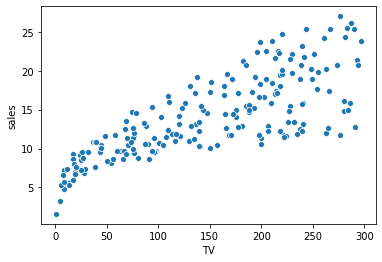

In [4]:
sns.scatterplot(data=df,x="TV",y='sales')
plt.show()

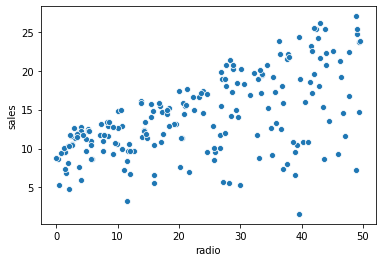

In [5]:
sns.scatterplot(data=df,x="radio",y='sales')
plt.show()

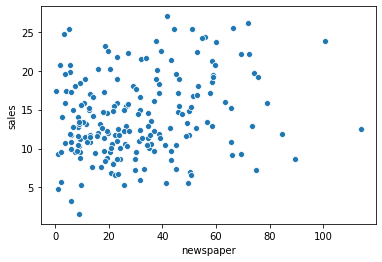

In [6]:
sns.scatterplot(data=df,x="newspaper",y='sales')
plt.show()

# Model

In [7]:
X = df[['TV']]
Y = df['sales']

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [9]:
lr = LinearRegression()

In [10]:
# to find out value of intercept and slope
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
lr.intercept_

6.923519536059554

In [12]:
# slope
lr.coef_

array([0.04812204])

In [13]:
# y_cap = theta_0+(theta_1*X)
Y_pred = lr.predict(X_test)

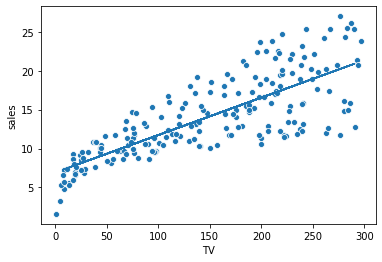

In [14]:
# Draw the best fit line from data
plt.figure()
sns.scatterplot(data=df,x="TV",y='sales')
plt.plot(X_test,Y_pred)
plt.show()

In [15]:
mean_squared_error(Y_test,Y_pred)

10.571057434656955

In [16]:
r2_score(Y_test,Y_pred)

0.575061860494331

# In Function form all operations in one cell

In [17]:
def model(X):
    X = df[X]
    Y = df["sales"]
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
    lr = LinearRegression()
    lr.fit(X_train,Y_train)
    print("intercept",lr.intercept_)
    print("slope",lr.coef_)
    Y_pred = lr.predict(X_test)
    print("MSE",mean_squared_error(Y_test,Y_pred))
    print("R2",r2_score(Y_test,Y_pred))

In [18]:
model(['TV'])

intercept 6.923519536059554
slope [0.04812204]
MSE 10.571057434656955
R2 0.575061860494331


In [19]:
model(['radio'])

intercept 9.440936561425886
slope [0.1874808]
MSE 14.604130559272193
R2 0.41293932917162335


In [20]:
model(['newspaper'])

intercept 11.829668884877877
slope [0.06532045]
MSE 25.49745237441493
R2 -0.024953278429509007


In [21]:
model(['TV','radio','newspaper'])

intercept 2.937215734690609
slope [0.04695205 0.17658644 0.00185115]
MSE 1.9289249074665733
R2 0.9224605706201434


In [22]:
# ignore the newspaper variable because there presence of multicollinearity and less value of slope
model(["TV","radio"])

intercept 2.9647671191401574
slope [0.04697554 0.17765046]
MSE 1.9147050289721788
R2 0.9230321850256801


In [23]:
# To check the Linear Regression assumptions

In [24]:
def model(X):
    X = df[X]
    Y = df["sales"]
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
    lr = LinearRegression()
    lr.fit(X_train,Y_train)
    print("intercept",lr.intercept_)
    print("slope",lr.coef_)
    Y_pred = lr.predict(X_test)
    print("MSE",mean_squared_error(Y_test,Y_pred))
    print("R2",r2_score(Y_test,Y_pred))
    
    residuals = Y_test - Y_pred
    plt.scatter(Y_pred,residuals)
    plt.show()
    
    sns.distplot(residuals)
    plt.show()

intercept 6.923519536059554
slope [0.04812204]
MSE 10.571057434656955
R2 0.575061860494331


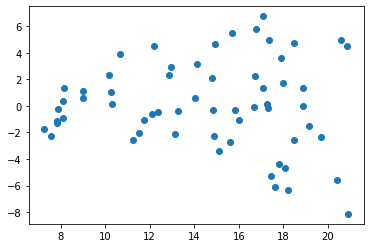

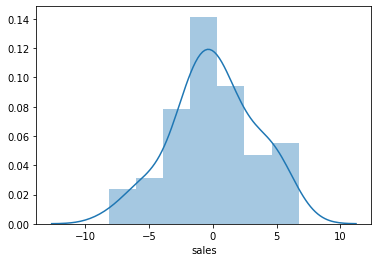

In [25]:
model(['TV'])

intercept 9.440936561425886
slope [0.1874808]
MSE 14.604130559272193
R2 0.41293932917162335


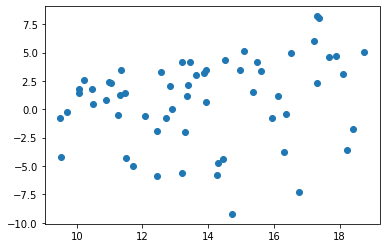

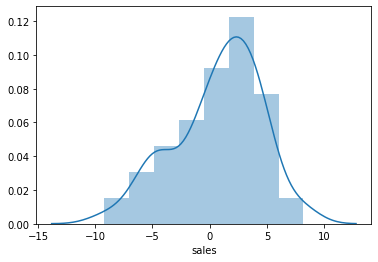

In [26]:
model(["radio"])

intercept 11.829668884877877
slope [0.06532045]
MSE 25.49745237441493
R2 -0.024953278429509007


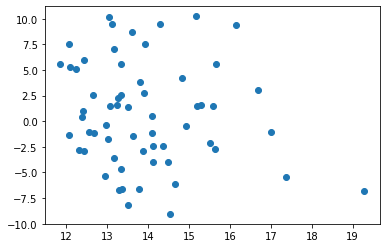

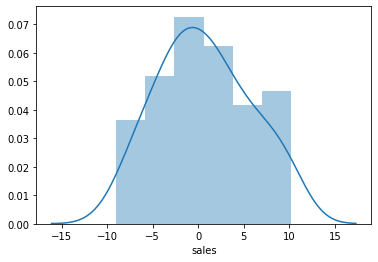

In [27]:
model(['newspaper'])

intercept 2.937215734690609
slope [0.04695205 0.17658644 0.00185115]
MSE 1.9289249074665733
R2 0.9224605706201434


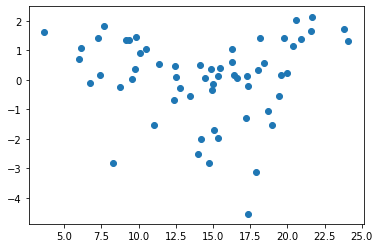

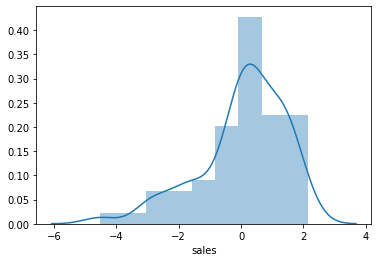

In [28]:
model(["TV",'radio','newspaper'])

intercept 2.9647671191401574
slope [0.04697554 0.17765046]
MSE 1.9147050289721788
R2 0.9230321850256801


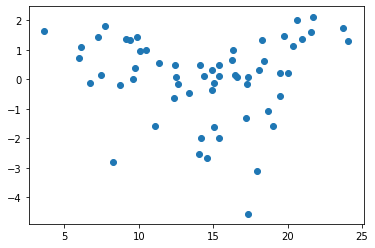

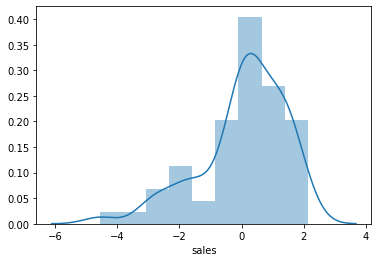

In [29]:
model(["TV",'radio'])

In [30]:
#  By graph here not a linear relationship so we go for Polynomial Regression

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
pf = PolynomialFeatures(2)   # degree 2

In [33]:
X = df[["TV","radio"]]

In [34]:
X_poly = pf.fit_transform(X)

MSE 0.1723834508100511
R2 0.9930704848288276


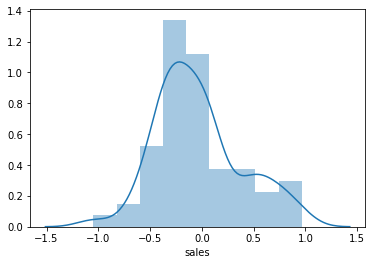

In [35]:
Y = df["sales"]
X_train,X_test,Y_train,Y_test = train_test_split(X_poly,Y,test_size=0.3,random_state=1)
lr = LinearRegression()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)
print("MSE",mean_squared_error(Y_test,Y_pred))
print("R2",r2_score(Y_test,Y_pred))
    
residuals = Y_test - Y_pred

    
sns.distplot(residuals)
plt.show()

In [36]:
# In above graph data follows Normal distribution

# Gradient Descent

In [56]:
def gradient_descent(x,y):
    
    
    n = len(x)
    learning_rate = 0.01     # 0.1-alpha
    intercept = slope = 0
    iterations = 1000
    
    for i in range(iterations):
        
        y_pred = x*slope + intercept
        
        mse = mean_squared_error(y_pred,y)
        
        md = (2/n)*sum(x*(y-y_pred))
        bd = (2/n)*sum(y-y_pred)

        slope = slope + (learning_rate * md)
        intercept = intercept + (learning_rate * bd)
        
        print("slope: ",slope,"intercept: ",intercept,"mse: ",mse,"iteration: ",i)

In [57]:
x = np.array([1,2,3,4,5])
y = np.array([10,20,30,40,60])

In [58]:
gradient_descent(x,y)

slope:  2.4 intercept:  0.64 mse:  1320.0 iteration:  0
slope:  4.2336 intercept:  1.1232 mse:  776.0255999999999 iteration:  1
slope:  5.634816 intercept:  1.48672 mse:  459.00091391999996 iteration:  2
slope:  6.70595328 intercept:  1.7588966400000001 mse:  274.23144311193596 iteration:  3
slope:  7.52510976 intercept:  1.9613615104000002 mse:  166.5339207123075 iteration:  4
slope:  8.151903922176 intercept:  2.110627694592 mse:  103.75026967819463 iteration:  5
slope:  8.63184739762176 intercept:  2.2193009053696 mse:  67.14035370011058 iteration:  6
slope:  8.999682915822797 intercept:  2.297004043404902 mse:  45.783348057147755 iteration:  7
slope:  9.281932431737488 intercept:  2.351082987587436 mse:  33.31513572095529 iteration:  8
slope:  9.498842317499994 intercept:  2.3871453819314383 mse:  26.02702332583673 iteration:  9
slope:  9.66586828473411 intercept:  2.40947193524281 mse:  21.7577669623714 iteration:  10
slope:  9.794808945978037 intercept:  2.421330399453907 mse:  1

slope:  10.866385014101292 intercept:  0.09270979318154661 mse:  11.069563893591575 iteration:  149
slope:  10.870217723408114 intercept:  0.07887249647183814 mse:  11.048842823089535 iteration:  150
slope:  10.874037474470018 intercept:  0.06508198313791452 mse:  11.02826163003509 iteration:  151
slope:  10.87784431109834 intercept:  0.05133809500695512 mse:  11.007819370186539 iteration:  152
slope:  10.881638276956288 intercept:  0.03764067444091565 mse:  10.98751510567611 iteration:  153
slope:  10.885419415559449 intercept:  0.023989564334720076 mse:  10.967347904967289 iteration:  154
slope:  10.889187770276287 intercept:  0.010384608114458753 mse:  10.947316842811755 iteration:  155
slope:  10.892943384328637 intercept:  -0.00317435026440762 mse:  10.927421000207113 iteration:  156
slope:  10.8966863007922 intercept:  -0.01668746631883768 mse:  10.907659464354696 iteration:  157
slope:  10.900416562597046 intercept:  -0.030154895039993003 mse:  10.888031328617704 iteration:  158

slope:  11.18931096104644 intercept:  -1.073155339138542 mse:  9.569835417275026 iteration:  248
slope:  11.192051869964535 intercept:  -1.0830508900185576 mse:  9.55923825380634 iteration:  249
slope:  11.194783511973451 intercept:  -1.0929129844160586 mse:  9.548712626418654 iteration:  250
slope:  11.197505918404255 intercept:  -1.1027417354461444 mse:  9.538258052208143 iteration:  251
slope:  11.200219120482087 intercept:  -1.1125372558414768 mse:  9.527874051530835 iteration:  252
slope:  11.202923149326516 intercept:  -1.1222996579535724 mse:  9.517560147980515 iteration:  253
slope:  11.205618035951897 intercept:  -1.132029053754092 mse:  9.507315868367026 iteration:  254
slope:  11.208303811267726 intercept:  -1.141725554836124 mse:  9.49714074269445 iteration:  255
slope:  11.210980506078993 intercept:  -1.151389272415465 mse:  9.487034304139582 iteration:  256
slope:  11.213648151086543 intercept:  -1.1610203173318954 mse:  9.47699608903046 iteration:  257
slope:  11.2163067

slope:  11.398241747937913 intercept:  -1.8274617731964484 mse:  8.86494726542082 iteration:  336
slope:  11.400276269783358 intercept:  -1.8348070426087943 mse:  8.859108444699483 iteration:  337
slope:  11.402303912987547 intercept:  -1.8421274779436199 mse:  8.853309038898326 iteration:  338
slope:  11.404324700806903 intercept:  -1.8494231631640003 mse:  8.847548781947182 iteration:  339
slope:  11.406338656419225 intercept:  -1.8566941819491345 mse:  8.841827409572009 iteration:  340
slope:  11.408345802923943 intercept:  -1.8639406176953053 mse:  8.83614465928272 iteration:  341
slope:  11.410346163342394 intercept:  -1.8711625535168357 mse:  8.83050027036118 iteration:  342
slope:  11.412339760618078 intercept:  -1.8783600722470426 mse:  8.824893983849265 iteration:  343
slope:  11.414326617616924 intercept:  -1.8855332564391865 mse:  8.819325542536882 iteration:  344
slope:  11.416306757127552 intercept:  -1.892682188367418 mse:  8.813794690950298 iteration:  345
slope:  11.418

slope:  11.604596733624897 intercept:  -2.57246874760885 mse:  8.37344446428113 iteration:  460
slope:  11.60593357708395 intercept:  -2.5772951766741667 mse:  8.370923529926543 iteration:  461
slope:  11.607265900725931 intercept:  -2.5821052877657205 mse:  8.368419613122416 iteration:  462
slope:  11.60859371983217 intercept:  -2.5868991360539617 mse:  8.365932598991908 iteration:  463
slope:  11.60991704963233 intercept:  -2.591676776522813 mse:  8.363462373433634 iteration:  464
slope:  11.611235905304586 intercept:  -2.5964382639702963 mse:  8.361008823116453 iteration:  465
slope:  11.612550301975794 intercept:  -2.6011836530091657 mse:  8.358571835474248 iteration:  466
slope:  11.61386025472167 intercept:  -2.60591299806753 mse:  8.356151298700784 iteration:  467
slope:  11.615165778566954 intercept:  -2.6106263533894793 mse:  8.353747101744599 iteration:  468
slope:  11.616466888485594 intercept:  -2.615323773035707 mse:  8.351359134303873 iteration:  469
slope:  11.6177635994

slope:  11.724791142485943 intercept:  -3.006408701076639 mse:  8.180913233386812 iteration:  567
slope:  11.725721613203634 intercept:  -3.0097679956042627 mse:  8.179691979816699 iteration:  568
slope:  11.72664893803509 intercept:  -3.0131159324843955 mse:  8.178478970310621 iteration:  569
slope:  11.727573127616434 intercept:  -3.016452550116813 mse:  8.177274149217087 iteration:  570
slope:  11.728494192547828 intercept:  -3.019777886771463 mse:  8.176077461260268 iteration:  571
slope:  11.729412143393594 intercept:  -3.0230919805889034 mse:  8.174888851537503 iteration:  572
slope:  11.730326990682338 intercept:  -3.026394869580741 mse:  8.173708265516698 iteration:  573
slope:  11.731238744907069 intercept:  -3.0296865916300666 mse:  8.17253564903393 iteration:  574
slope:  11.732147416525319 intercept:  -3.0329671844918895 mse:  8.171370948290866 iteration:  575
slope:  11.733053015959262 intercept:  -3.036236685793571 mse:  8.170214109852354 iteration:  576
slope:  11.733955

slope:  11.80385361470729 intercept:  -3.2918493121822885 mse:  8.091898016752609 iteration:  667
slope:  11.804516778202624 intercept:  -3.2942435428210803 mse:  8.091277659806106 iteration:  668
slope:  11.805177699567311 intercept:  -3.2966296786568163 mse:  8.09066149057502 iteration:  669
slope:  11.805836386381912 intercept:  -3.299007747057719 mse:  8.090049480790201 iteration:  670
slope:  11.806492846201355 intercept:  -3.3013777752994793 mse:  8.08944160237332 iteration:  671
slope:  11.807147086555025 intercept:  -3.303739790565571 mse:  8.08883782743564 iteration:  672
slope:  11.807799114946853 intercept:  -3.306093819947561 mse:  8.088238128276606 iteration:  673
slope:  11.808448938855399 intercept:  -3.308439890445421 mse:  8.087642477382747 iteration:  674
slope:  11.809096565733936 intercept:  -3.3107780289678366 mse:  8.087050847426255 iteration:  675
slope:  11.809742003010541 intercept:  -3.313108262332516 mse:  8.086463211263812 iteration:  676
slope:  11.81038525

slope:  11.863478055968539 intercept:  -3.50711246386816 mse:  8.04451951747244 iteration:  774
slope:  11.86393963148755 intercept:  -3.5087788979489094 mse:  8.044218988767955 iteration:  775
slope:  11.864399646437224 intercept:  -3.510439697879184 mse:  8.043920488780483 iteration:  776
slope:  11.864858106093786 intercept:  -3.5120948827078338 mse:  8.043624003815188 iteration:  777
slope:  11.865315015715623 intercept:  -3.513744471419304 mse:  8.043329520269648 iteration:  778
slope:  11.865770380543344 intercept:  -3.5153884829338553 mse:  8.04303702463331 iteration:  779
slope:  11.86622420579984 intercept:  -3.517026936107779 mse:  8.042746503486802 iteration:  780
slope:  11.866676496690342 intercept:  -3.5186598497336137 mse:  8.042457943501367 iteration:  781
slope:  11.867127258402483 intercept:  -3.5202872425403617 mse:  8.04217133143815 iteration:  782
slope:  11.86757649610636 intercept:  -3.5219091331937036 mse:  8.041886654147774 iteration:  783
slope:  11.8680242149

slope:  11.909378108048056 intercept:  -3.672826215882877 mse:  8.019616059519738 iteration:  895
slope:  11.909684497230456 intercept:  -3.673932378048103 mse:  8.019483641441331 iteration:  896
slope:  11.909989850522642 intercept:  -3.6750348003209683 mse:  8.019352117250302 iteration:  897
slope:  11.91029417142692 intercept:  -3.6761334953459075 mse:  8.01922148091244 iteration:  898
slope:  11.910597463433751 intercept:  -3.6772284757246045 mse:  8.019091726434294 iteration:  899
slope:  11.910899730021802 intercept:  -3.6783197540161376 mse:  8.018962847862884 iteration:  900
slope:  11.911200974657973 intercept:  -3.679407342737123 mse:  8.01883483928541 iteration:  901
slope:  11.911501200797446 intercept:  -3.680491254361859 mse:  8.018707694828985 iteration:  902
slope:  11.91180041188372 intercept:  -3.681571501322469 mse:  8.018581408660353 iteration:  903
slope:  11.912098611348648 intercept:  -3.6826480960090424 mse:  8.018455974985667 iteration:  904
slope:  11.91239580

In [71]:
# Gradient descent
from sklearn.linear_model import SGDRegressor

In [73]:
sg = SGDRegressor(alpha=0.005,max_iter=1000)

In [74]:
df = pd.read_csv("E:/ITVEDANT R/advertising.csv")

In [81]:
X = df[["TV",'radio']]
Y = df['sales']

In [82]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)


In [83]:
sg.fit(X_train,Y_train)

SGDRegressor(alpha=0.005, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [84]:
Y_pred = sg.predict(X_test)

In [85]:
r2_score(Y_test,Y_pred)

-2.838553591057495e+24